# Flair testing
Investigating long-term stellar flare rates with a flourish

In [12]:
import sys
sys.path.append('../')
import flair

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import astropy.units as u

%config InlineBackend.figure_format = 'retina'

# Setup stella and prepare the lightcurves

In [2]:
cnn, models = flair.flares.prep_stella("../data/")
lcs = flair.lightcurve.get_all_lightcurves(target='tic272272592', mission='TESS', author='SPOC')

Can only use stella.ConvNN.predict().
Models have already been downloaded to ~/.stella/models


# Run Stella

In [3]:
avg_pred = flair.flares.get_stella_predictions(cnn=cnn, models=models, lc=lcs[0])

  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 962us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 959us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 959us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 959us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 946us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 1ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 904us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 931us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 938us/step


  0%|          | 0/1 [00:00<?, ?it/s]

576/576 [==============================] - 1s 994us/step


100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


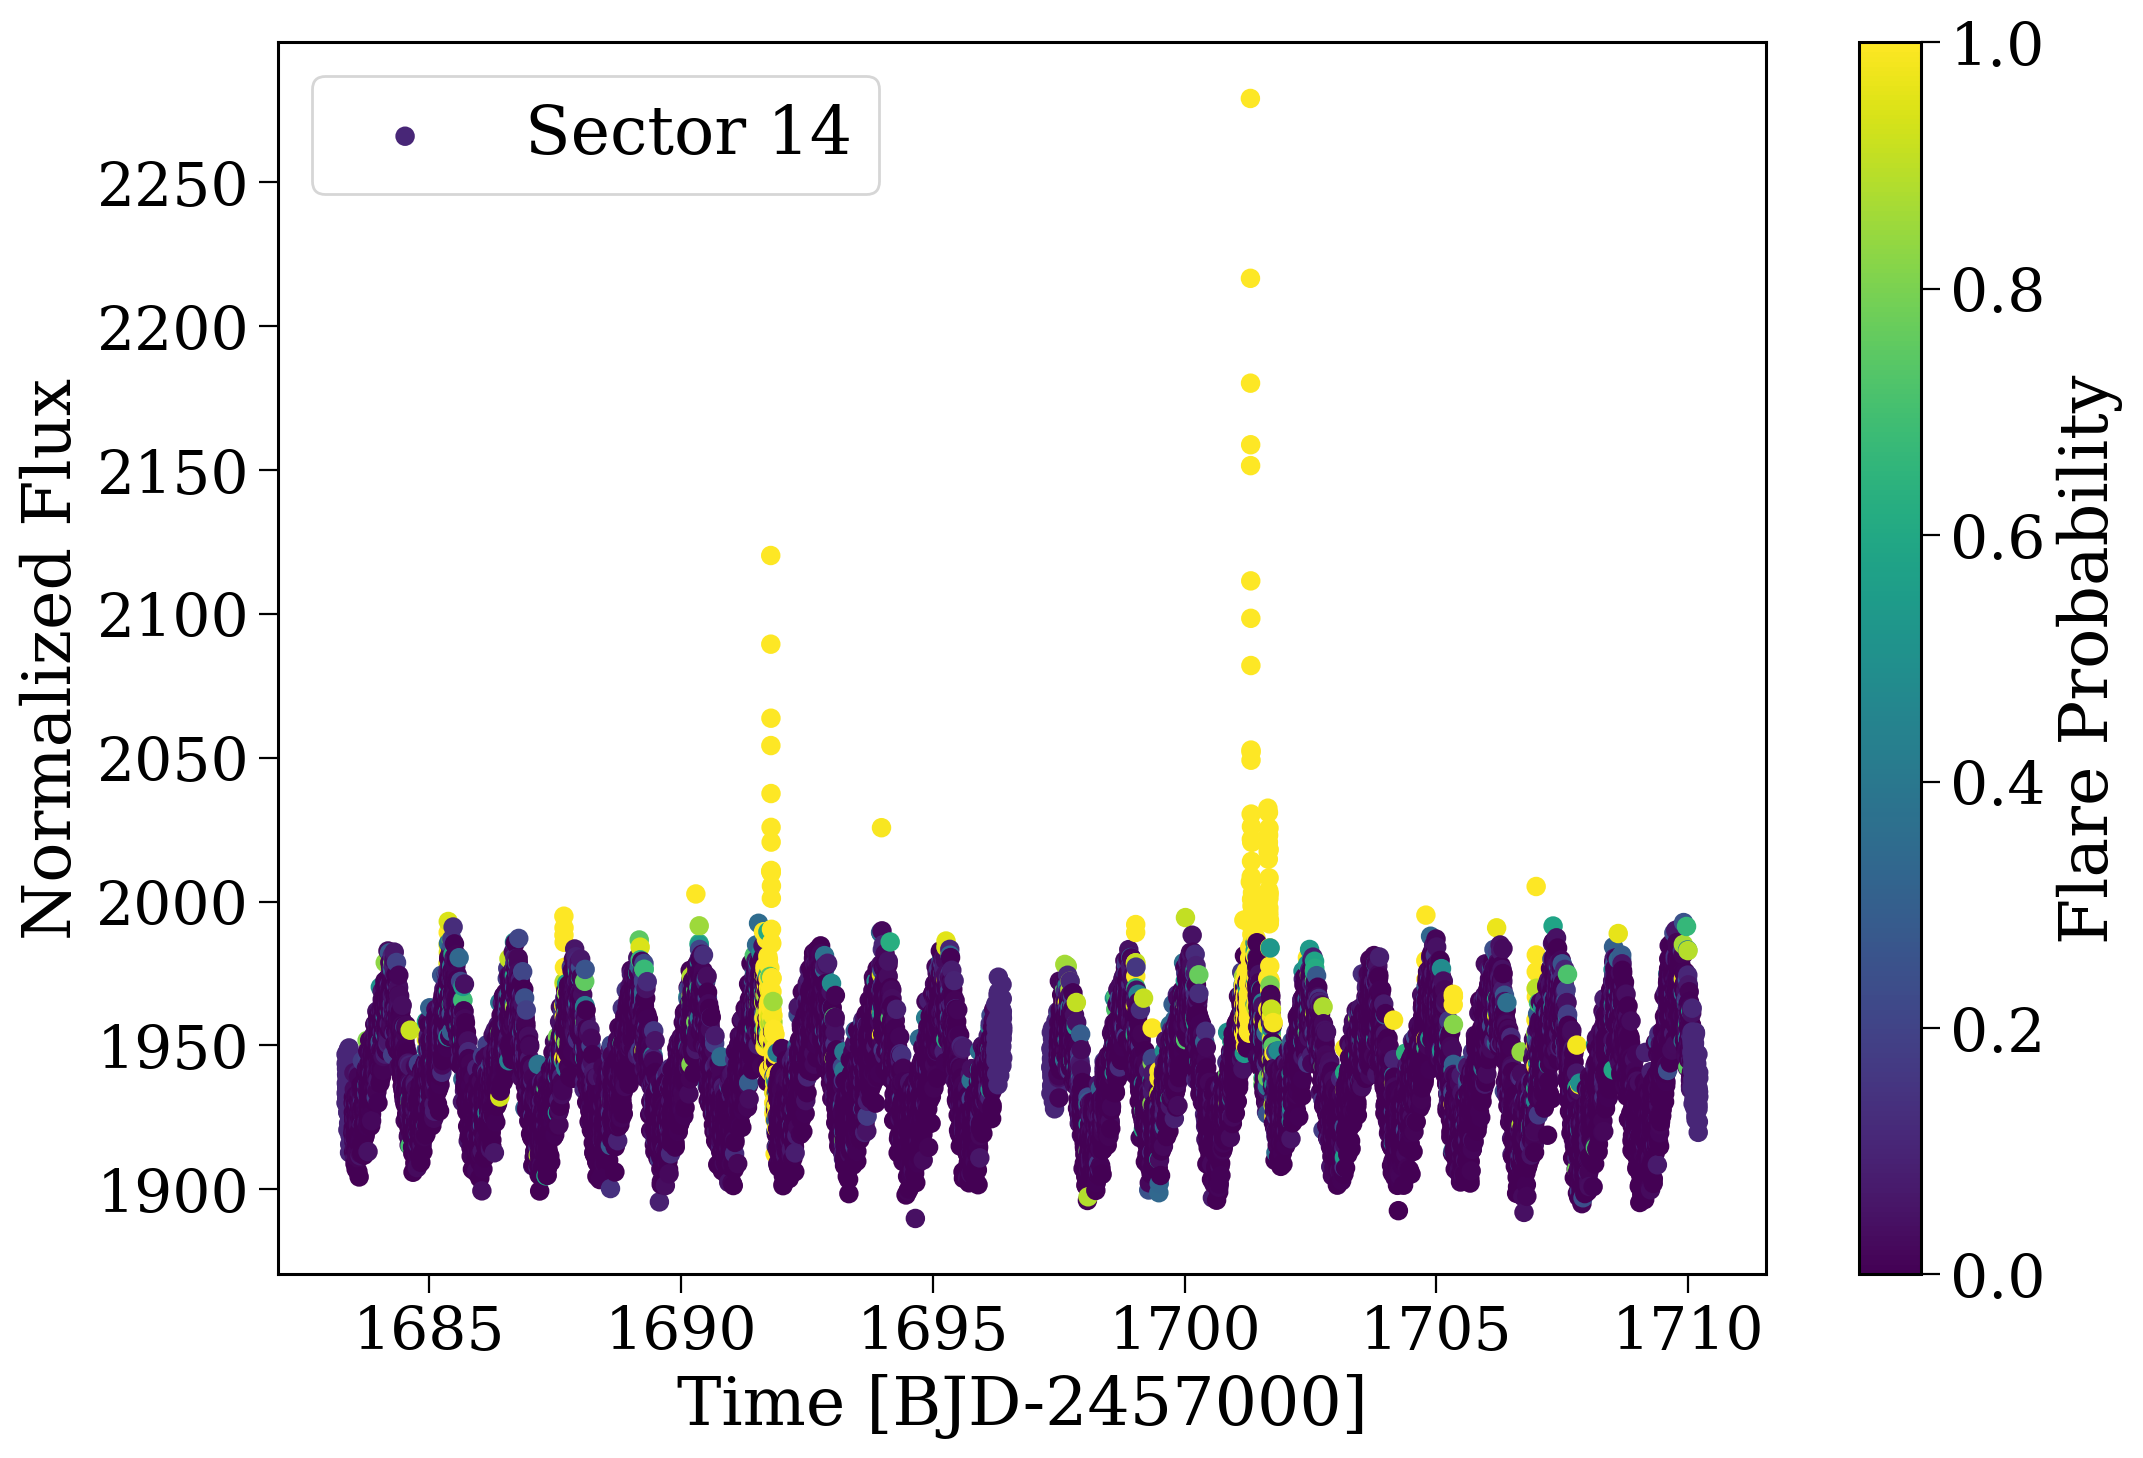

(<Figure size 1200x800 with 2 Axes>,
 <Axes: xlabel='Time [BJD-2457000]', ylabel='Normalized Flux'>)

In [4]:
flair.plot.plot_lc_with_probs(lc=lcs[0], avg_pred=avg_pred)

# Identify flares

In [5]:
flare_mask, flare_starts, flare_ends = flair.flares.get_flares(avg_pred)

In [6]:
opt_gp = flair.gp.fit_GP(lc=lcs[0], flare_mask=flare_mask)

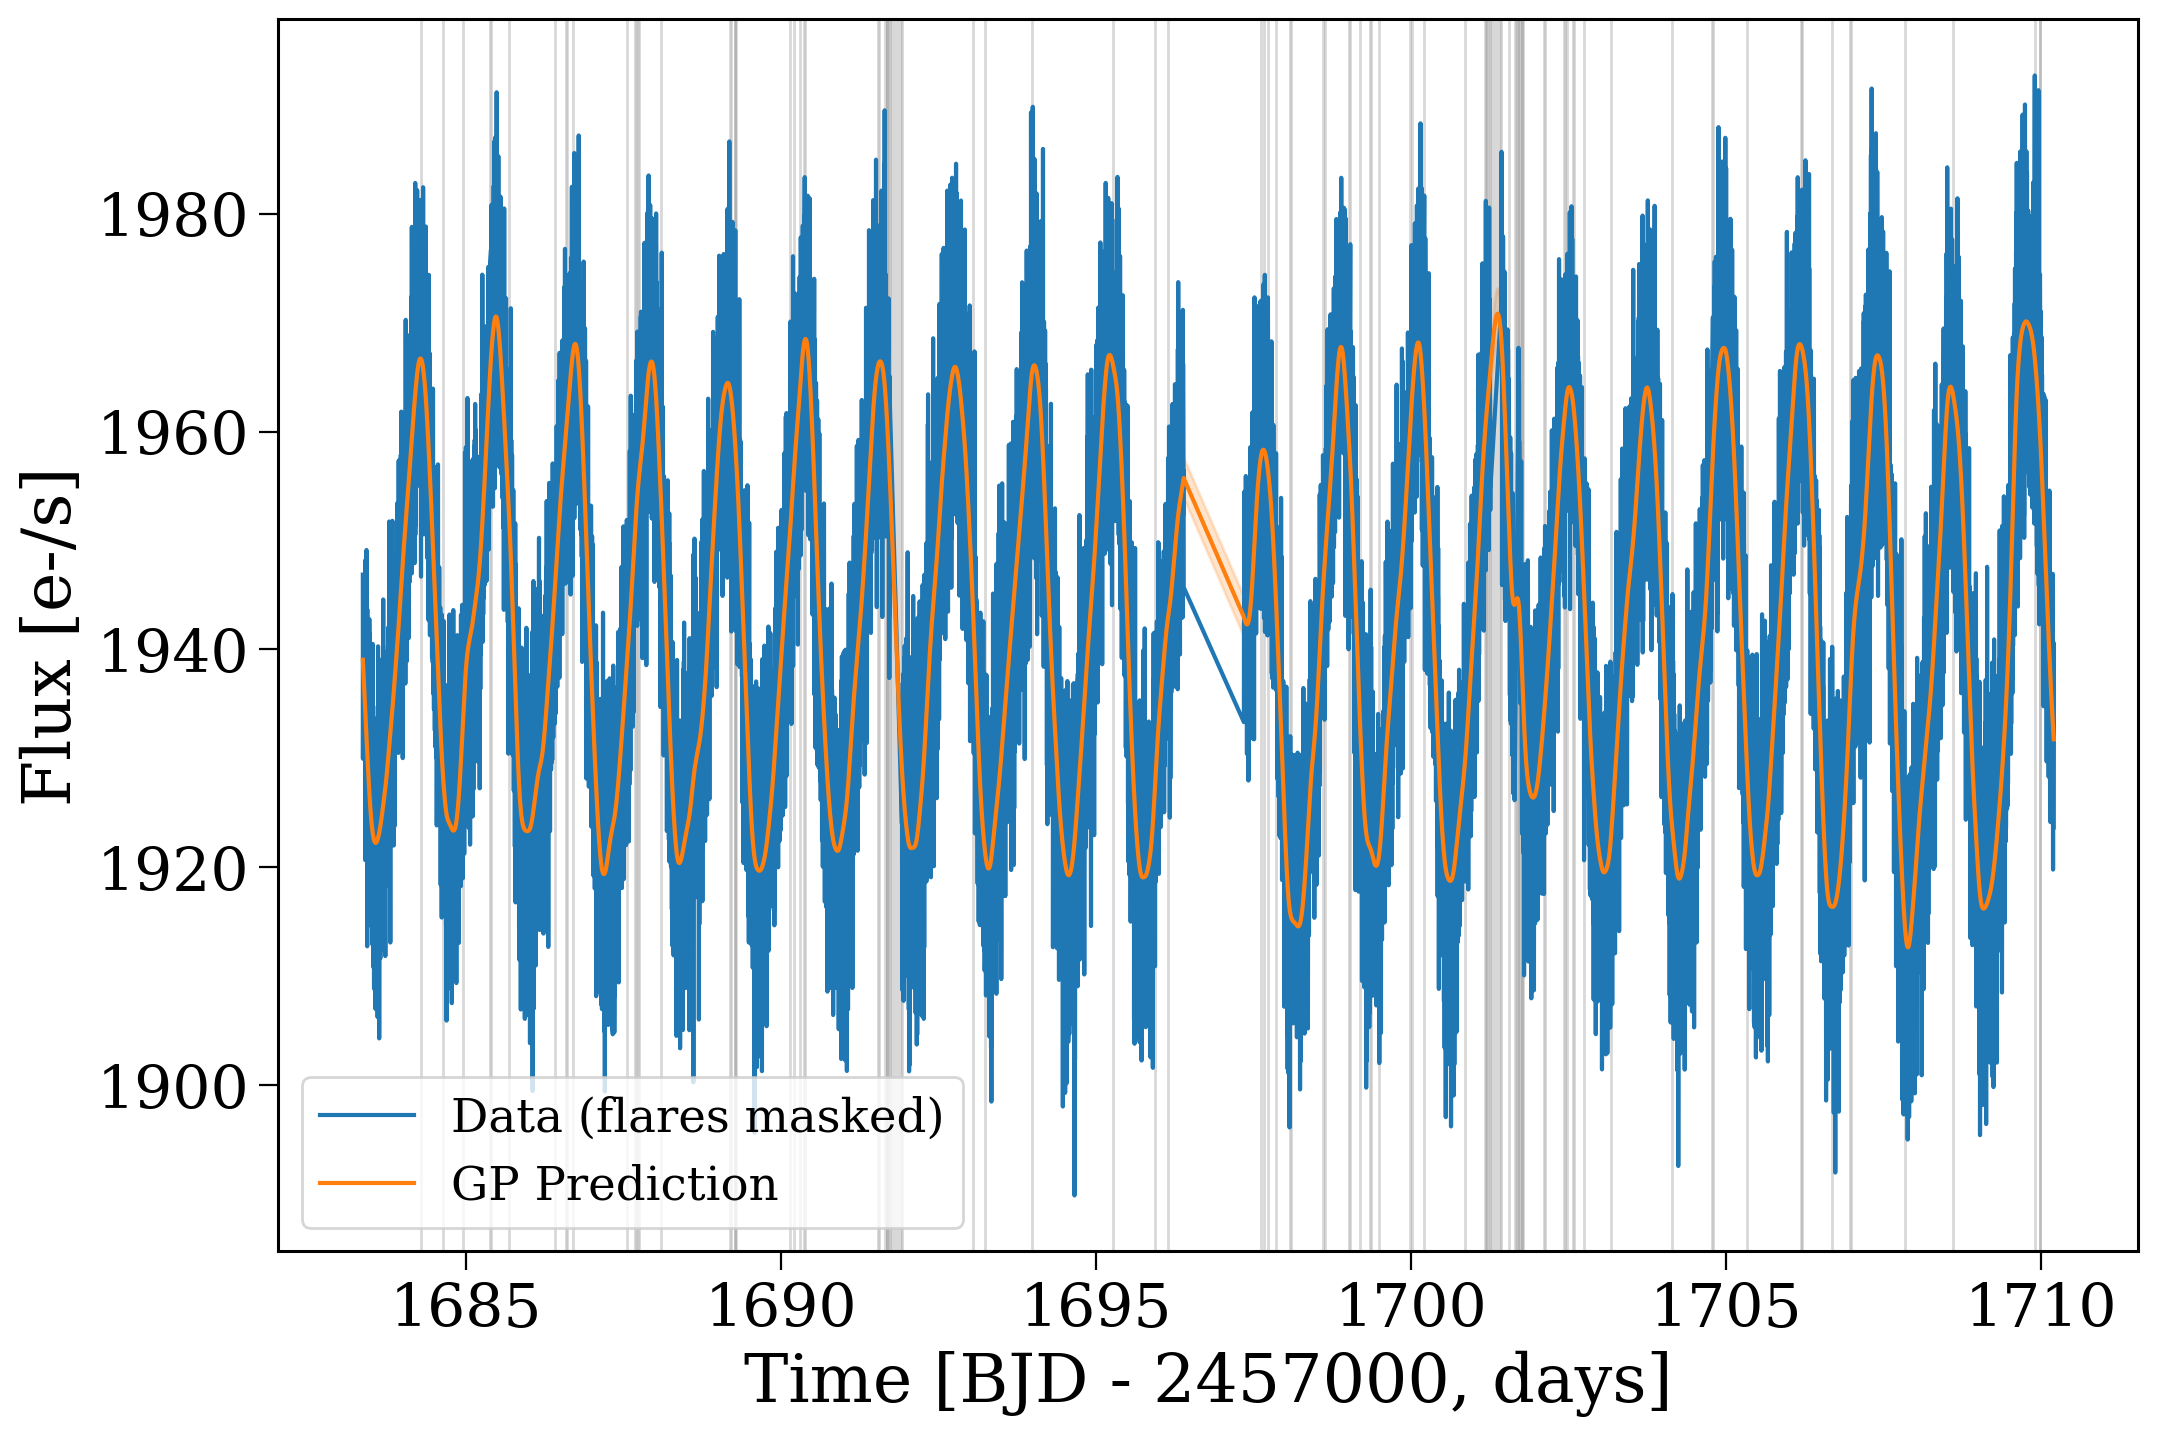

In [7]:
mu, variance, fig, ax = flair.plot.plot_lc_and_gp(lcs[0], flare_mask, flare_starts, flare_ends, opt_gp)

In [10]:
ed_s = flair.flares.calc_equivalent_durations(lc=lcs[0], flare_starts=flare_starts,
                                              flare_ends=flare_ends, gp_mean=mu).to(u.s)

In [18]:
colours = np.zeros_like(lcs[0].time.value)
for start, end, ed in zip(flare_starts, flare_ends, ed_s):
    colours[start:end] = ed.value

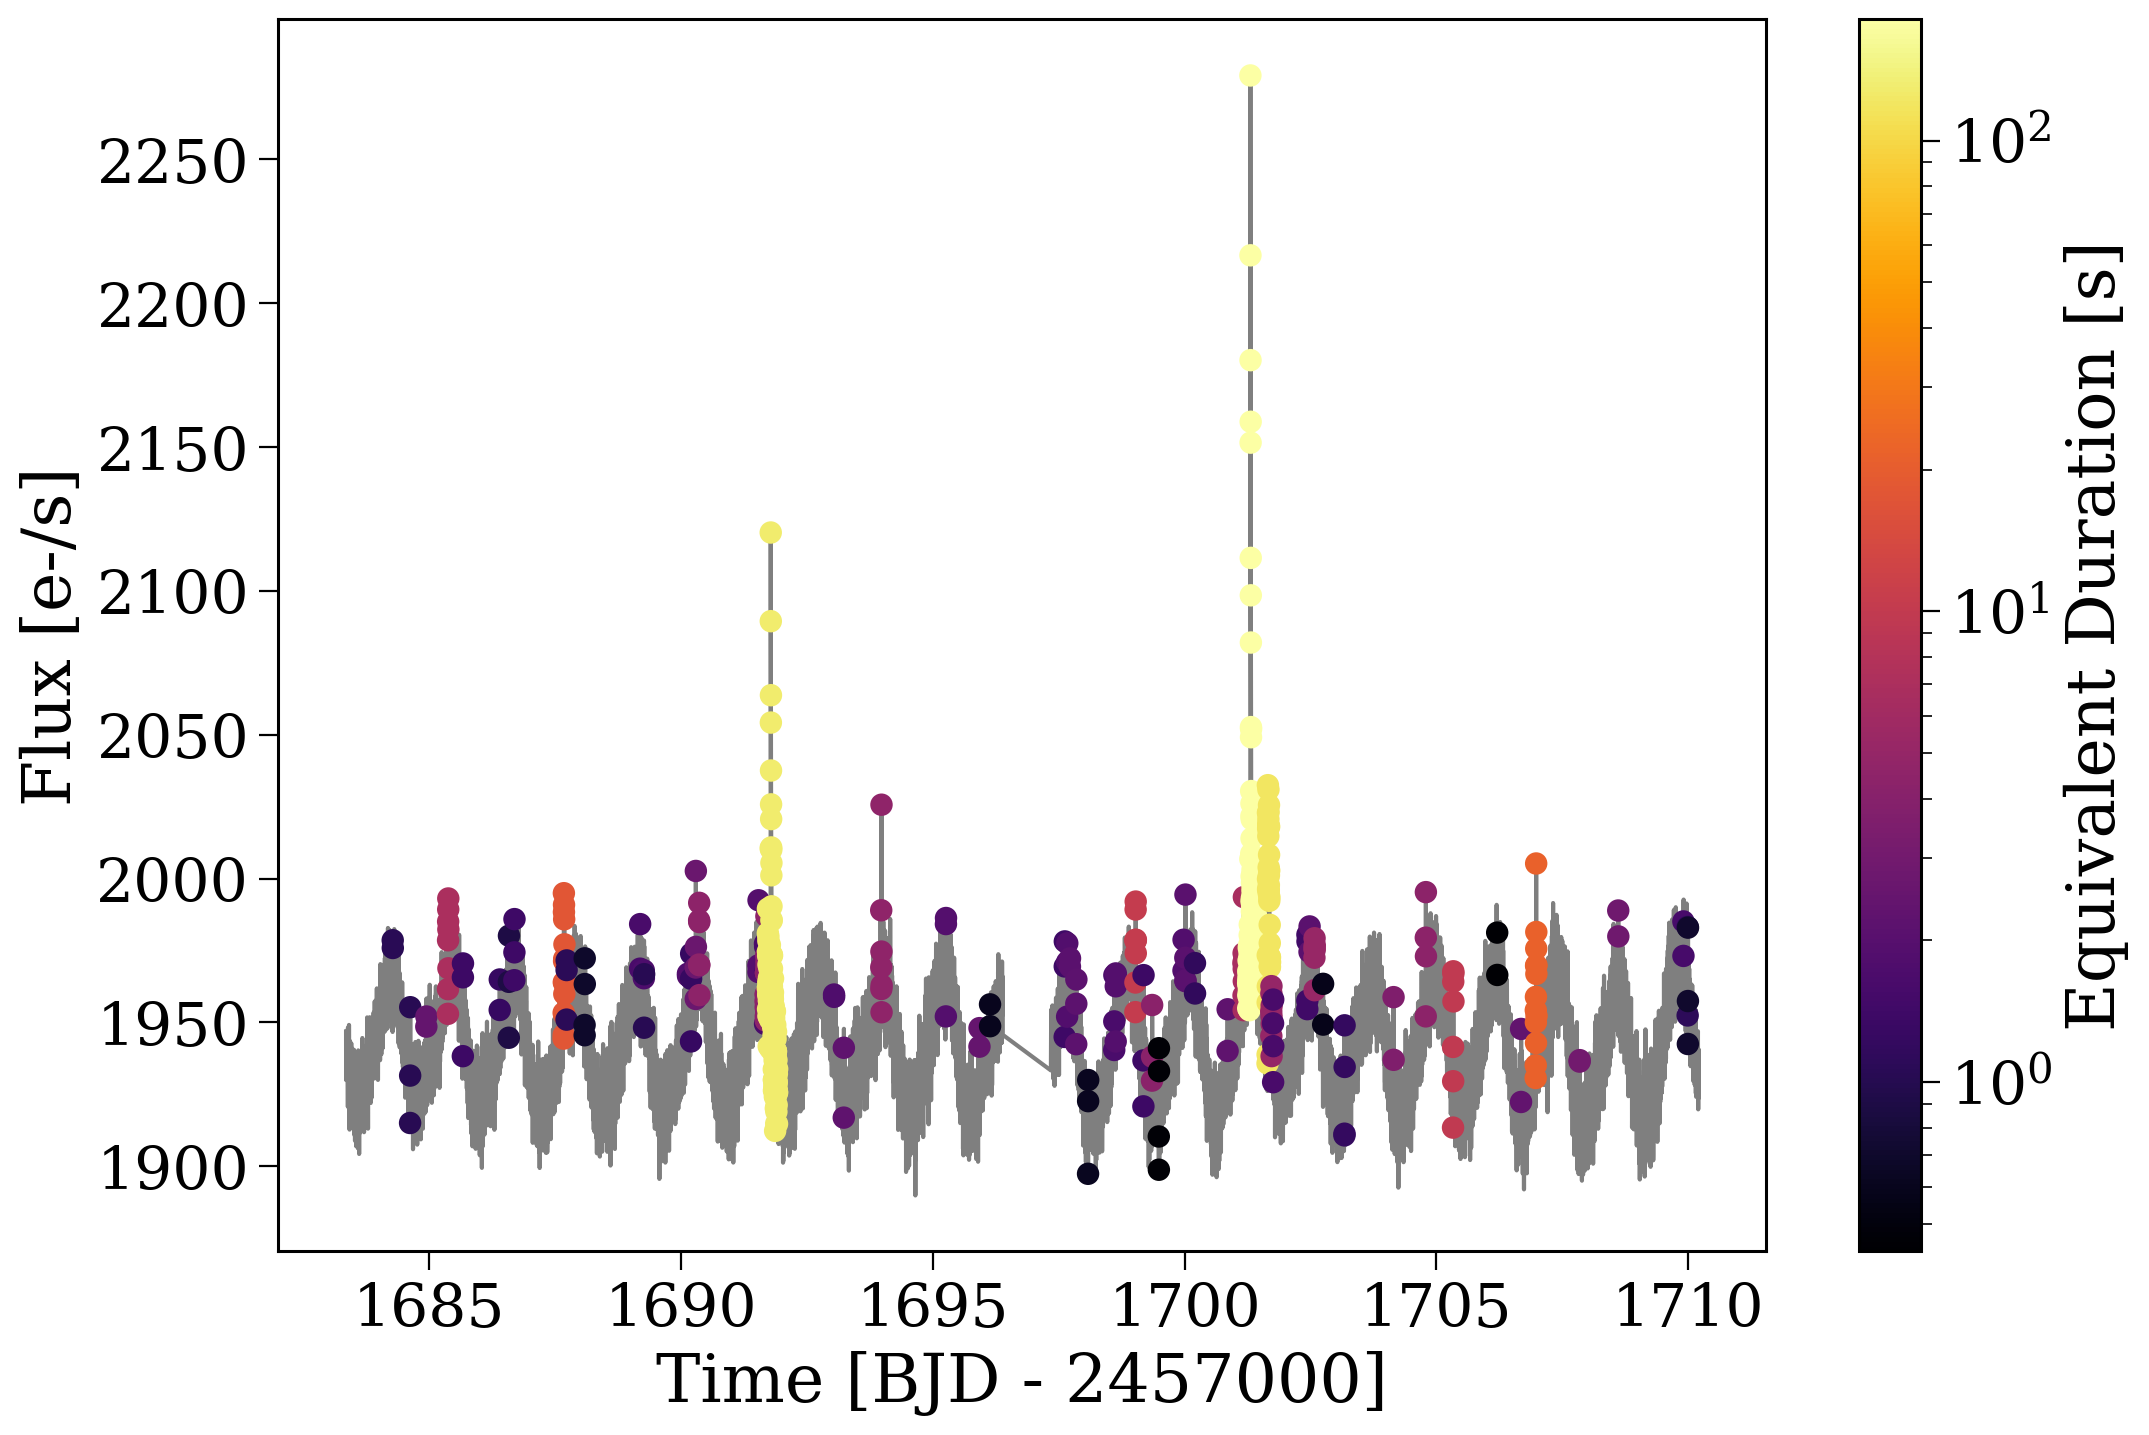

In [33]:
fig, ax = plt.subplots()

ax.plot(lcs[0].time.value, lcs[0].flux.value, c='k', alpha=0.5)
scatter = ax.scatter(lcs[0].time.value, lcs[0].flux.value, c=colours,
                     s=50, zorder=10, norm=mpl.colors.LogNorm(), cmap="inferno")

cbar = fig.colorbar(scatter, ax=ax, label='Equivalent Duration [s]')

ax.set(xlabel='Time [BJD - 2457000]', ylabel='Flux [e-/s]')

plt.show()